In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)


This notebook implements K-means clustering on the mall customer segmentation dataset. The goal is to segment customers based on their spending behaviors and demographic information to help the mall better understand its customer base for targeted marketing.


# 1. Load Dataset

In [21]:
customers = pd.read_csv('data/Mall_Customers.csv')

# 2. Explore the dataset

In [22]:
print("Shape of the dataset:", customers.shape)
print("\nFirst 5 rows:")
print(customers.head())

print("\nMissing values:")
print(customers.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(customers.describe())

Shape of the dataset: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Summary statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           1

# 3. Data Visualization


Gender distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64


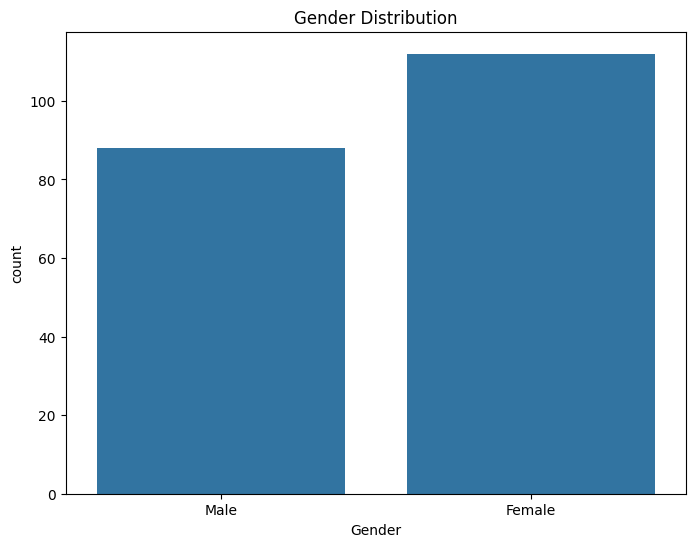

In [23]:
if 'Gender' in customers.columns:
    print("\nGender distribution:")
    print(customers['Gender'].value_counts())
    
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Gender', data=customers)
    plt.title('Gender Distribution')
    plt.show()


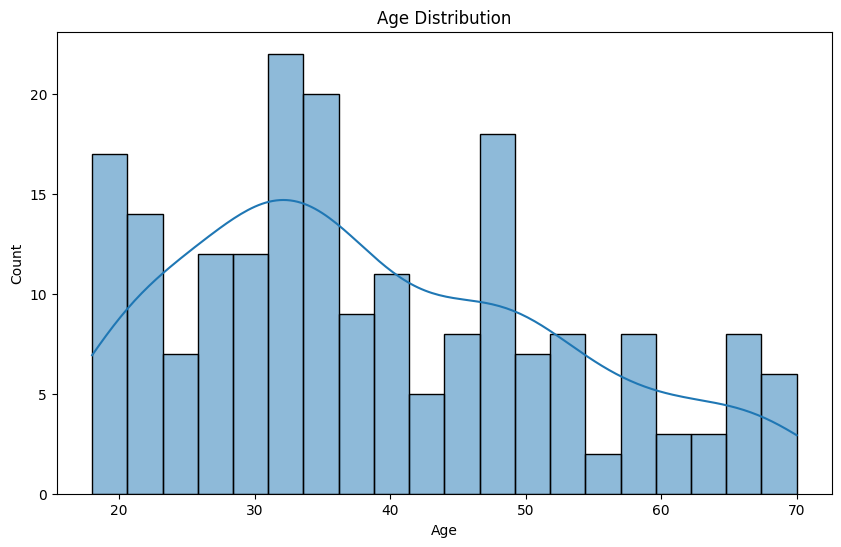

In [24]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(customers['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

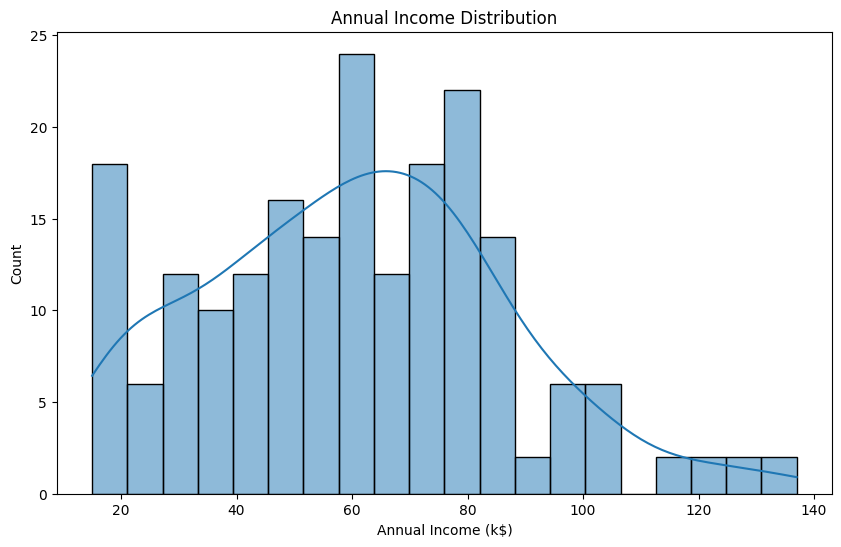

In [25]:
# Annual income distribution
plt.figure(figsize=(10, 6))
sns.histplot(customers['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

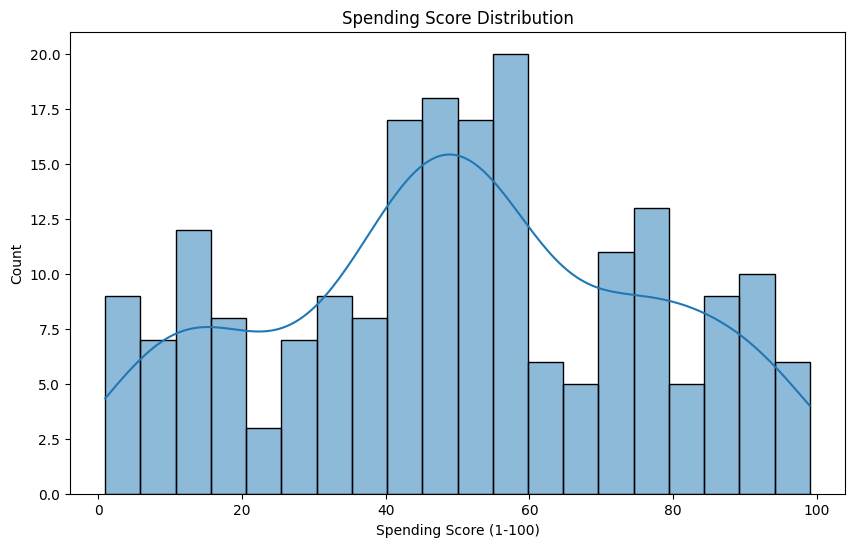

In [26]:
# Spending score distribution
plt.figure(figsize=(10, 6))
sns.histplot(customers['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

<Figure size 1000x800 with 0 Axes>

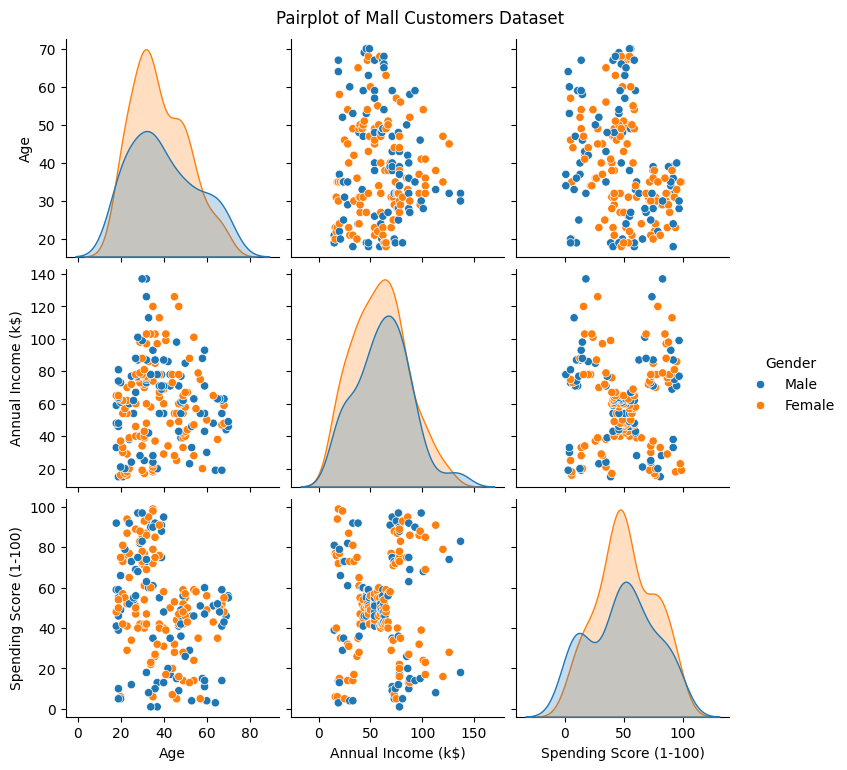

In [27]:
# Pairplot to visualize relationships between numerical features
plt.figure(figsize=(10, 8))
sns.pairplot(customers.drop('CustomerID', axis=1), hue='Gender' if 'Gender' in customers.columns else None)
plt.suptitle('Pairplot of Mall Customers Dataset', y=1.02)
plt.show()

# 4. Data preprocessing

In [28]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = customers[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled. Mean and standard deviation after scaling:")
print("Mean:", X_scaled.mean(axis=0))
print("Std:", X_scaled.std(axis=0))

Features scaled. Mean and standard deviation after scaling:
Mean: [-1.02140518e-16 -2.13162821e-16 -1.46549439e-16]
Std: [1. 1. 1.]


# 5. Determine the optimal number of clusters

I'll use two methods to determine the optimal number of clusters:
1. Elbow method
2. Silhouette method

#### Determining the Optimal Number of Clusters

When applying K-means clustering, one of the most important decisions is selecting the appropriate number of clusters (k). Two popular methods to determine the optimal k are:

#### 1. Elbow Method

The Elbow method plots the value of the cost function (inertia) against the number of clusters. Inertia measures the sum of squared distances between each data point and its closest centroid.

How it works:
- As k increases, inertia will always decrease (each cluster will be smaller and tighter)
- The idea is to find the "elbow point" where adding more clusters doesn't significantly reduce inertia
- The optimal k is at the point where the curve bends most sharply (forming an "elbow")

Interpretation:
In my analysis, examining the elbow curve shows the inertia decreasing significantly up to around k=5-6, after which the rate of decrease slows down. This suggests that 5-6 clusters might be optimal, as additional clusters yield diminishing returns.

#### 2. Silhouette Method

The Silhouette method measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1:
- Values near 1 indicate data points are well-clustered
- Values near 0 indicate overlapping clusters
- Values near -1 indicate data points may be assigned to the wrong cluster



### Why Both Methods Matter

Using both methods together provides more robust evidence for selecting the optimal k:
- The elbow method is intuitive but sometimes ambiguous (the "elbow" can be hard to pinpoint)
- The silhouette method provides a more objective metric but doesn't always align with business needs
- When both methods suggest similar values, we can be more confident in our choice


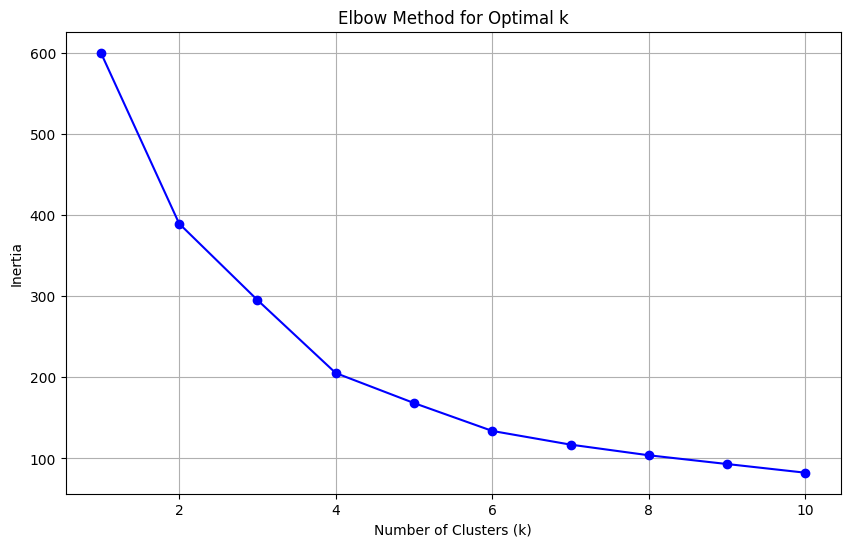

In [29]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

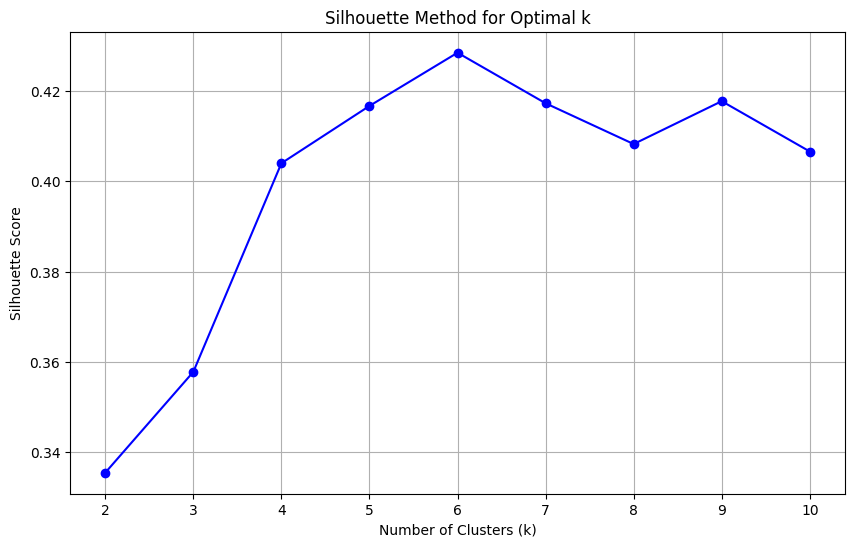

In [30]:
# Silhouette method
silhouette_scores = []
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.show()

In [32]:
optimal_k = 6
print(f"Based on both methods, the optimal number of clusters appears to be {optimal_k}. In the plot, there's a clear peak at k=6, with a score of approximately 0.425. This suggests that 6 clusters would provide the most distinct and well-separated groupings for this mall customer dataset.")


Based on both methods, the optimal number of clusters appears to be 6. In the plot, there's a clear peak at k=6, with a score of approximately 0.425. This suggests that 6 clusters would provide the most distinct and well-separated groupings for this mall customer dataset.


In [33]:
print(f"\nApplying K-Means clustering with k={optimal_k}")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customers['Cluster'] = kmeans.fit_predict(X_scaled)

# Get cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
cluster_centers_df['Cluster'] = range(optimal_k)


Applying K-Means clustering with k=6


In [34]:
print("\nAnalyzing the clusters")
# Count of customers in each cluster
print("Number of customers in each cluster:")
print(customers['Cluster'].value_counts())

# Summary statistics for each cluster
print("\nSummary statistics for each cluster:")
cluster_summary = customers.groupby('Cluster')[features].mean()
print(cluster_summary)


Analyzing the clusters
Number of customers in each cluster:
Cluster
0    45
1    39
3    39
2    33
4    23
5    21
Name: count, dtype: int64

Summary statistics for each cluster:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        26.794872           57.102564               48.128205
2        41.939394           88.939394               16.969697
3        32.692308           86.538462               82.128205
4        25.000000           25.260870               77.608696
5        45.523810           26.285714               19.380952



Visualizing the clusters


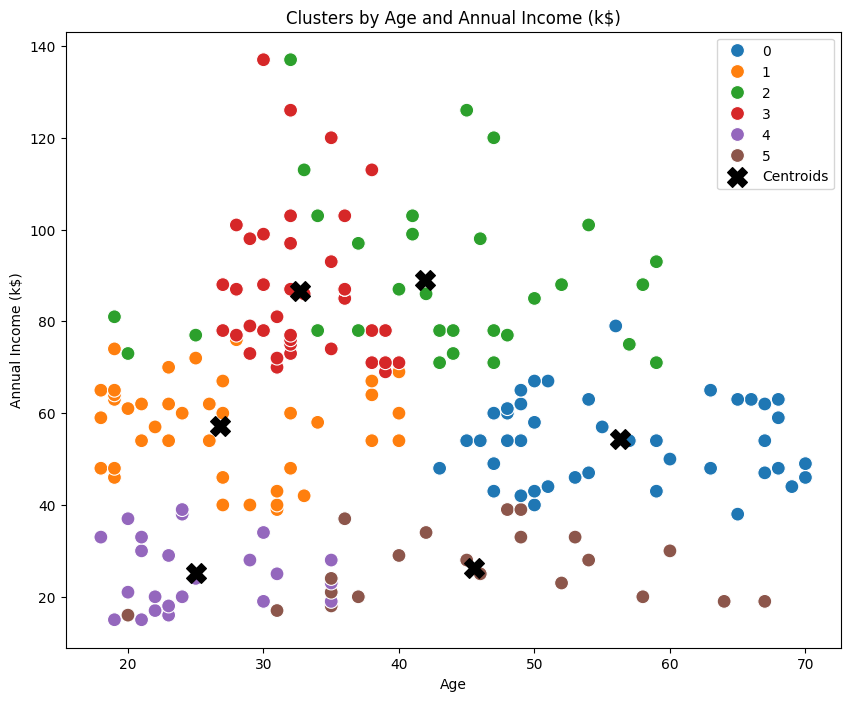

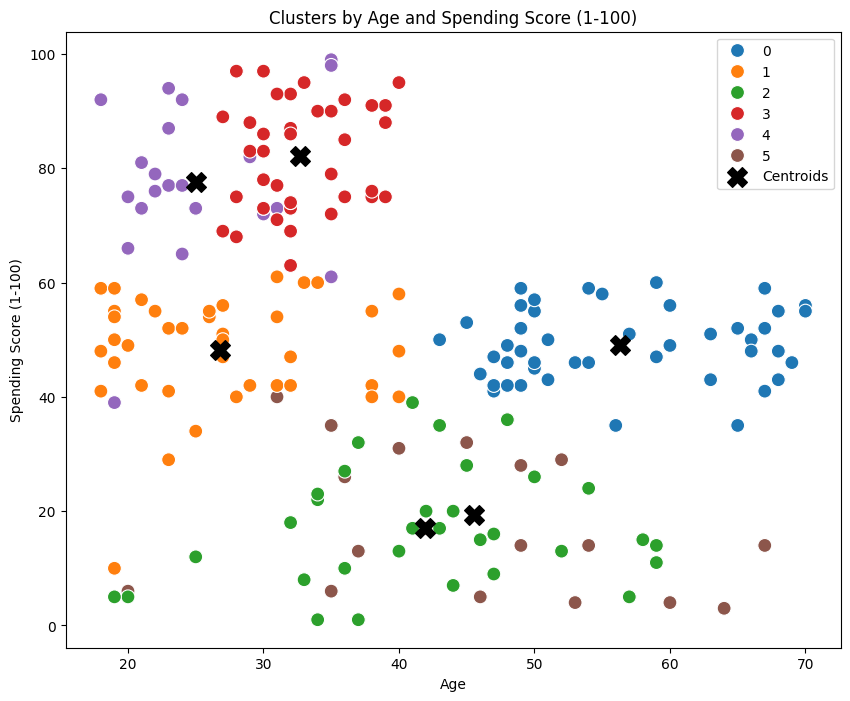

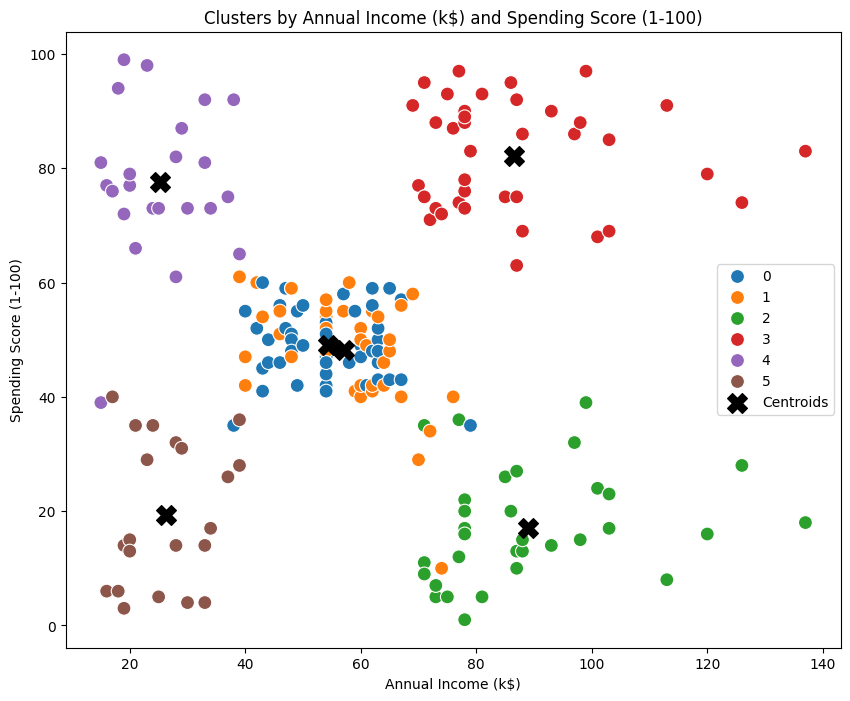

In [35]:
print("\nVisualizing the clusters")
# 2D scatter plots for all feature combinations
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=features[i], y=features[j], hue='Cluster', data=customers, palette='tab10', s=100)
        plt.scatter(cluster_centers_df[features[i]], cluster_centers_df[features[j]], 
                   c='black', s=200, marker='X', label='Centroids')
        plt.title(f'Clusters by {features[i]} and {features[j]}')
        plt.legend()
        plt.show()

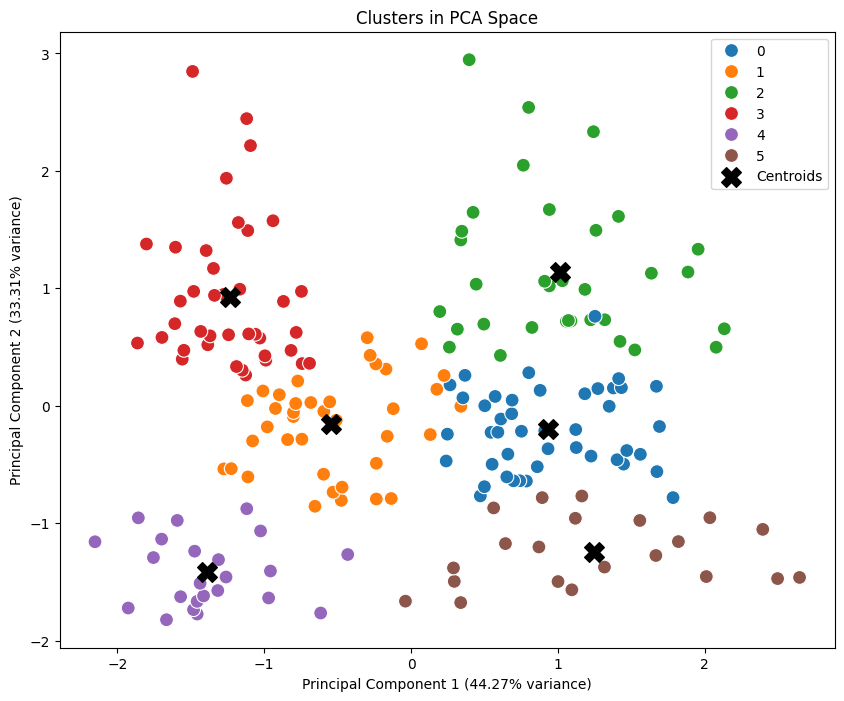

Variance explained by the first two principal components: 77.57%


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the original dataframe
customers['PCA1'] = X_pca[:, 0]
customers['PCA2'] = X_pca[:, 1]

# Plot the clusters in PCA 
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customers, palette='tab10', s=100)

# Transform cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.title('Clusters in PCA Space')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend()
plt.show()

print(f"Variance explained by the first two principal components: {sum(pca.explained_variance_ratio_):.2%}")


Based on our clustering results, we can characterize each customer segment:

In [37]:
print("\nCluster profiles:")
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    print(f"Number of customers: {customers[customers['Cluster'] == i].shape[0]}")
    print(f"Average age: {customers[customers['Cluster'] == i]['Age'].mean():.1f}")
    print(f"Average annual income: ${customers[customers['Cluster'] == i]['Annual Income (k$)'].mean():.1f}k")
    print(f"Average spending score: {customers[customers['Cluster'] == i]['Spending Score (1-100)'].mean():.1f}/100")
    
    if 'Gender' in customers.columns:
        gender_count = customers[customers['Cluster'] == i]['Gender'].value_counts()
        gender_percent = gender_count / gender_count.sum() * 100
        print("Gender distribution:")
        for gender, count in gender_count.items():
            print(f"  - {gender}: {count} ({gender_percent[gender]:.1f}%)")


Cluster profiles:

Cluster 0:
Number of customers: 45
Average age: 56.3
Average annual income: $54.3k
Average spending score: 49.1/100
Gender distribution:
  - Female: 26 (57.8%)
  - Male: 19 (42.2%)

Cluster 1:
Number of customers: 39
Average age: 26.8
Average annual income: $57.1k
Average spending score: 48.1/100
Gender distribution:
  - Female: 25 (64.1%)
  - Male: 14 (35.9%)

Cluster 2:
Number of customers: 33
Average age: 41.9
Average annual income: $88.9k
Average spending score: 17.0/100
Gender distribution:
  - Male: 19 (57.6%)
  - Female: 14 (42.4%)

Cluster 3:
Number of customers: 39
Average age: 32.7
Average annual income: $86.5k
Average spending score: 82.1/100
Gender distribution:
  - Female: 21 (53.8%)
  - Male: 18 (46.2%)

Cluster 4:
Number of customers: 23
Average age: 25.0
Average annual income: $25.3k
Average spending score: 77.6/100
Gender distribution:
  - Female: 13 (56.5%)
  - Male: 10 (43.5%)

Cluster 5:
Number of customers: 21
Average age: 45.5
Average annual in

### Mall Customer Segmentation Summary

Based on K-means clustering analysis with k=6, I've identified the following customer segments:

#### Cluster 0: Established Moderate Spenders (45 customers)
- **Profile**: Older customers (avg. age 56.3) with moderate income ($54.3k) and average spending habits (49.1/100)
- **Demographics**: Slightly more female (57.8%)
- **Insight**: This segment represents mature customers who are financially stable but cautious with spending
- **Recommendation**: Target with value-focused promotions and loyalty programs that emphasize quality and practicality

#### Cluster 1: Young Average Spenders (39 customers)
- **Profile**: Young adults (avg. age 26.8) with moderate income ($57.1k) and moderate spending scores (48.1/100)
- **Demographics**: Predominantly female (64.1%)
- **Insight**: Young professionals who are building careers with disposable income but balanced spending habits
- **Recommendation**: Offer trendy but affordable products, focus on social media marketing and weekend events

#### Cluster 2: Affluent Low Spenders (33 customers)
- **Profile**: Middle-aged customers (avg. age 41.9) with high income ($88.9k) but very low spending scores (17.0/100)
- **Demographics**: More males (57.6%)
- **Insight**: High-earning but extremely price-sensitive customers who rarely shop at the mall
- **Recommendation**: Create exclusive high-value offerings and personalized premium services to entice spending

#### Cluster 3: Young Affluent High Spenders (39 customers)
- **Profile**: Young adults (avg. age 32.7) with high income ($86.5k) and very high spending scores (82.1/100)
- **Demographics**: Balanced gender distribution (53.8% female)
- **Insight**: Most valuable customer segment - young professionals with high disposable income who enjoy shopping
- **Recommendation**: Priority for premium services, exclusive product launches, and VIP events

#### Cluster 4: Young Budget Enthusiasts (23 customers)
- **Profile**: Youngest group (avg. age 25.0) with low income ($25.3k) but high spending scores (77.6/100)
- **Demographics**: More females (56.5%)
- **Insight**: Budget-conscious young customers who still prioritize shopping despite limited resources
- **Recommendation**: Offer budget-friendly promotions, student discounts, and affordable trendy items

#### Cluster 5: Mature Budget Conservatives (21 customers)
- **Profile**: Middle-aged customers (avg. age 45.5) with low income ($26.3k) and very low spending scores (19.4/100)
- **Demographics**: Predominantly female (61.9%)
- **Insight**: Most conservative customers with limited resources and minimal mall spending
- **Recommendation**: Basic necessities at competitive prices, practical value offerings and essential services

### Why does this matter?:
1. Clusters 3 and 4 represent high-spending segments (despite different income levels) and should be priority targets
2. Clusters 2 and 5 show minimal mall engagement and require specialized strategies to increase spending
3. The PCA analysis explains 77.57% of data variance with just two components, confirming our clustering is capturing meaningful patterns
4. Age, income and spending patterns create distinct customer segments that require tailored marketing approaches

This customer segmentation provides a foundation for developing targeted marketing strategies, optimizing store layouts, and creating personalized promotions to maximize revenue across different customer groups.

In this notebook, I successfully:
1. Explored and visualized the mall customer dataset
2. Preprocessed the data for clustering
3. Determined the optimal number of clusters using the Elbow and Silhouette methods
4. Applied K-means clustering to segment customers
5. Analyzed and visualized the resulting clusters
6. Provided business insights and recommendations based on the segmentation

The customer segmentation can help the mall's marketing team develop targeted strategies for different customer groups, potentially increasing customer satisfaction and sales.
